In [1]:
## COVARIANVE STUFF

import numpy as np

A = np.array([[2,0], [1,5]])
v = np.array([3,4])

output = np.dot(A, v)
print(output)

[ 6 23]


In [2]:
eig_value, eig_vector = np.linalg.eig(A)

print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [3]:
# print(A * (0.9486833 + -0.31622777))
# print("---")
# print(A * (0 + 1))

In [4]:
# Check that Av = av
v1 = np.array([0, 1])
v2 = np.array([0.9486833, -0.31622777])

# multiply A with its first eigen-vector
print(np.dot(A, eig_vector[:, 0]))
print("or")
print(np.dot(A, v1))

# multiply the one eigen-value of A with its associated eigen-vector
print(eig_value[0]*eig_vector[:, 0])

# Similarly, multiply A with its second eigen-vector
print(np.dot(A, eig_vector[:, 1]))
print("or")
print(np.dot(A, v2))

# multiply the other eigen-value of A with its associated eigen-vector
print(eig_value[1]*eig_vector[:, 1])

[0. 5.]
or
[0 5]
[0. 5.]
[ 1.8973666  -0.63245553]
or
[ 1.8973666  -0.63245555]
[ 1.8973666  -0.63245553]


## Write a function that obtains the principle components from 17 types of food in UK

**Setup:**

- Download the dataset we will use for this activity: pca_uk
- Run the following in your terminal:

    conda install -c anaconda xlrd
    
    pip3 install xlrd

We will use two principle components as an example to see them visually, but we can pick 3 or more principle components as well

**Outline to follow:**

- use pandas to read in the excel spreadsheet (research how pandas can read an excel file)
- build a matrix of the feature values, not including the text labels
- calculate the PCA. This [sklearn module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) may be useful
- Obtain the principle components. This can be done by [applying the dimensionality reduction onto our matrix](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform)

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# use pandas to read in the excel spreadsheet
df = pd.read_excel('./Datasets/pca_uk.xlsx')

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


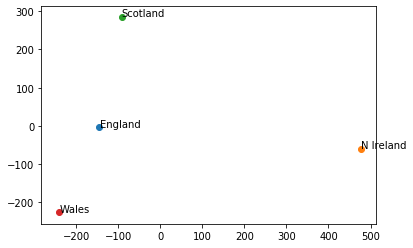

In [6]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

## Answer: 
Ireland is different from other three countries in UK

In [7]:
from sklearn.decomposition import PCA
import scipy

## How much of the information in the original dataset is preserved in the principle components?
Hint: use pca.explained_variance_ratio_

In [8]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print("--")
print(pca.explained_variance_)
print("--")
print(pca.explained_variance_ratio_)
print("--")
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
--
[105073.34576714  45261.62487597]
--
[0.67444346 0.29052475]
--
[0.67444346 0.96496821]


## How to calculate the correlation of the principle components:

In [9]:
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(-2.7755575615628914e-17, 1.0)


## Lets write our own function to obtain principle components

### Activity: PCA Steps

**Steps:**
1. Use the following matrix: X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
2. Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
3. Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can do this for you...) --> this new matrix will be our covariance matrix.
4. Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!
5. Sort the eigevalues so that they are in decresing order, and then find the top N (for example, 2) eigenvectors
6. Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix
7. Compare the result of custom function with PCA in sklearn

In [10]:
X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
# print(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r, "\n--")
print(pca.explained_variance_, "\n--")
print(pca.explained_variance_ratio_, "\n--")
print(pca.explained_variance_ratio_.cumsum())

print('\nCorrelation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]] 
--
[2.5171201  0.06621324] 
--
[0.97436907 0.02563093] 
--
[0.97436907 1.        ]

Correlation of PCA Component:
(3.0531133177191805e-16, 0.9999999999999997)


In [11]:
def PCA_custom(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    # mean center the data
    data = data - np.mean(data, axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = np.linalg.eig(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:, idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T


print(PCA_custom(X, 2))

[[ 1.65392786 -0.2775295 ]
 [ 0.84584087  0.31153366]
 [-0.55130929  0.09250983]
 [-1.94845944 -0.126514  ]]


In [12]:
# Our function to compare 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  data - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigen decomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    idx_n_comp = idx[:n_comp]
    # eigenvectors according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp]
    P = np.dot(C, eig_vector)
    return P


print(PCA_calculation(X, 2))

[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]
[[ 1.65392786 -0.2775295 ]
 [ 0.84584087  0.31153366]
 [-0.55130929  0.09250983]
 [-1.94845944 -0.126514  ]]
